Import all the libraries you need
- Pandas to compute and processs
- Numpy for numerical computations
- seaborn for plotting as well as matplotlib
- os for the file path (might need it further ig ＼（〇_ｏ）／)

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 
import os 
import seaborn as sns

**Naming the file as train and test to read them and then concatenate them to clean them as one file**

In [211]:
train = pd.read_csv(r'D:\Machine_Learning_Project\Dataset\Train.csv')
test = pd.read_csv(r'D:\Machine_Learning_Project\Dataset\Test.csv')
df = pd.concat([test, train])

**Get the info for the columns such as the data type as it is needed for the cleaning process**

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [215]:
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [217]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


**Shape is used here to get the number of columns and the number of rows**

In [219]:
df.shape

(14204, 12)

**Get all the is NaN or is Null values for all the rows so we can know what values have data that needs to be cleaned**

In [221]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

**Get the mean of the column 'Item_Weight' as it is a numerical field**

In [223]:
df['Item_Weight'].mean()

12.792854228644284

**Replace all the NaN values with the mean calculated**

In [225]:
df.fillna({'Item_Weight':df['Item_Weight'].mean()} , inplace=True)

In [227]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**The column  'Item_Weight' is cleaned successfully**

In [229]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [231]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

**Replace the Nan or the Null values with the mode of the column 'Outlet_Size'**

In [233]:
df.fillna({'Outlet_Size': df['Outlet_Size'].mode()[0]}, inplace=True)

In [235]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**Replace the Nan or the Null values with the mean of the column 'Item_Outlet_Sales'**

In [237]:
df.fillna({'Item_Outlet_Sales': df['Item_Outlet_Sales'].mean()}, inplace=True)

**Finally all the data is cleaned**

In [239]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Some values like lf or low fat are the same as Low Fat as well as reg is Regular**

In [247]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'} , inplace=True)

In [249]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [251]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,2181.288914
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,2181.288914
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,2181.288914
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,2181.288914
4,FDY38,12.792854,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,2181.288914
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,2181.288914
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,2181.288914
7,FDC48,12.792854,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,2181.288914
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Medium,Tier 2,Supermarket Type1,2181.288914
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Medium,Tier 2,Supermarket Type1,2181.288914


## Visualization for some columns (●'◡'●)

In [253]:
sns.set()

<Figure size 1000x500 with 0 Axes>

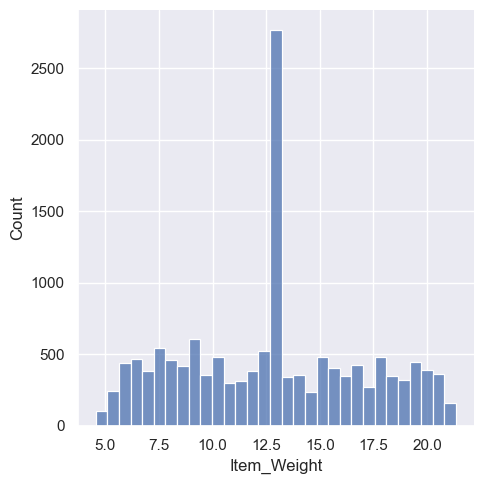

<Figure size 1000x500 with 0 Axes>

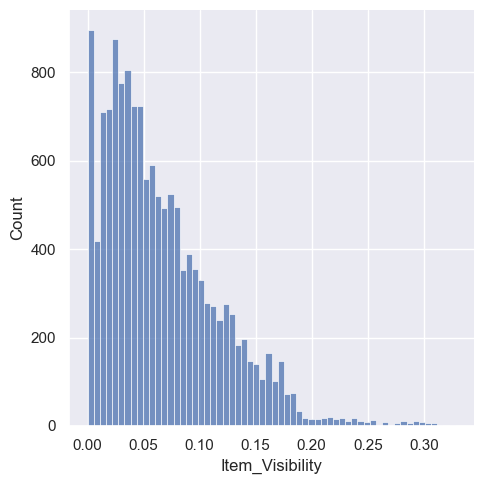

<Figure size 1000x500 with 0 Axes>

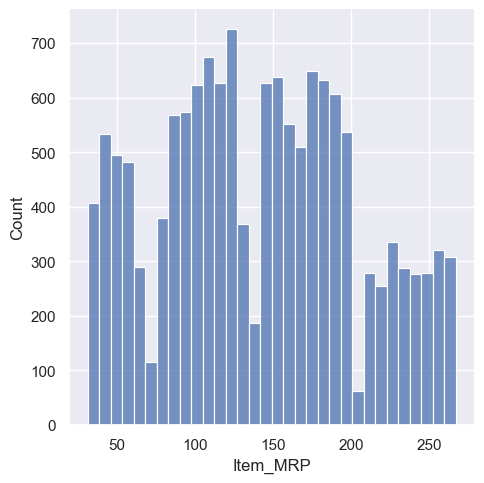

<Figure size 1000x500 with 0 Axes>

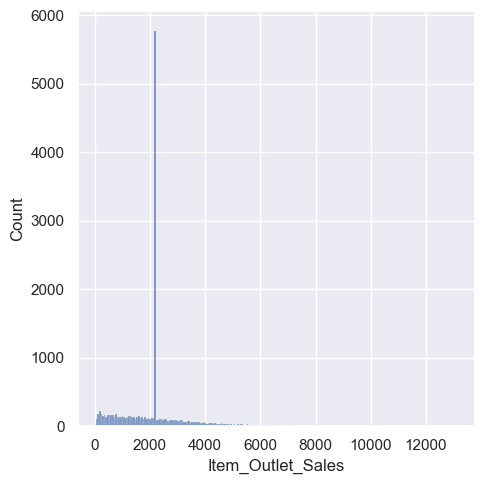

In [255]:
cols=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.displot(df[col])
    plt.show()

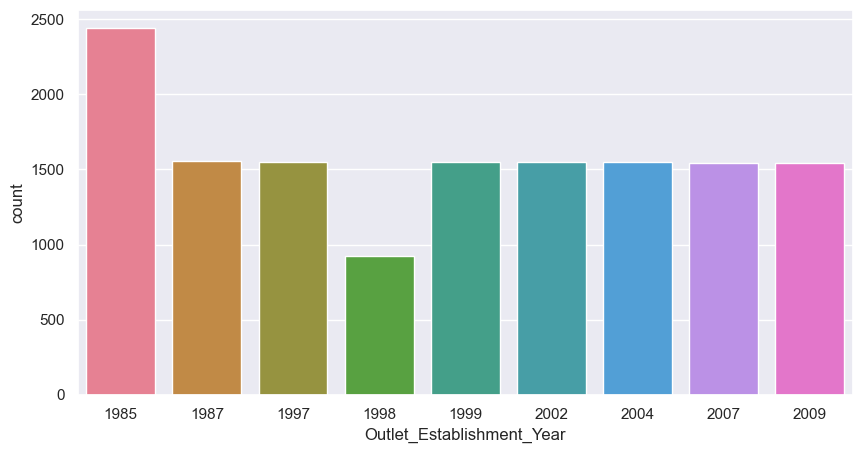

In [257]:
years = df['Outlet_Establishment_Year'].unique()
palette = sns.color_palette("husl", len(years))  
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Outlet_Establishment_Year',
    data=df,
    hue='Outlet_Establishment_Year', 
    palette=palette,
    dodge=False
)
plt.legend([], [], frameon=False) 
plt.show()


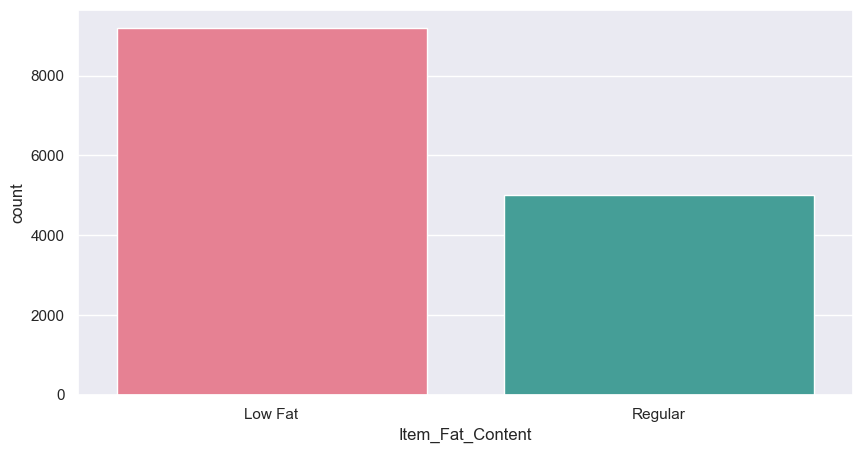

In [261]:
Fat = df['Item_Fat_Content'].unique()
palette = sns.color_palette("husl", len(Fat))  
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Item_Fat_Content',
    data=df,
    hue='Item_Fat_Content', 
    palette=palette,
    dodge=False  
)
plt.legend([], [], frameon=False)  
plt.show()


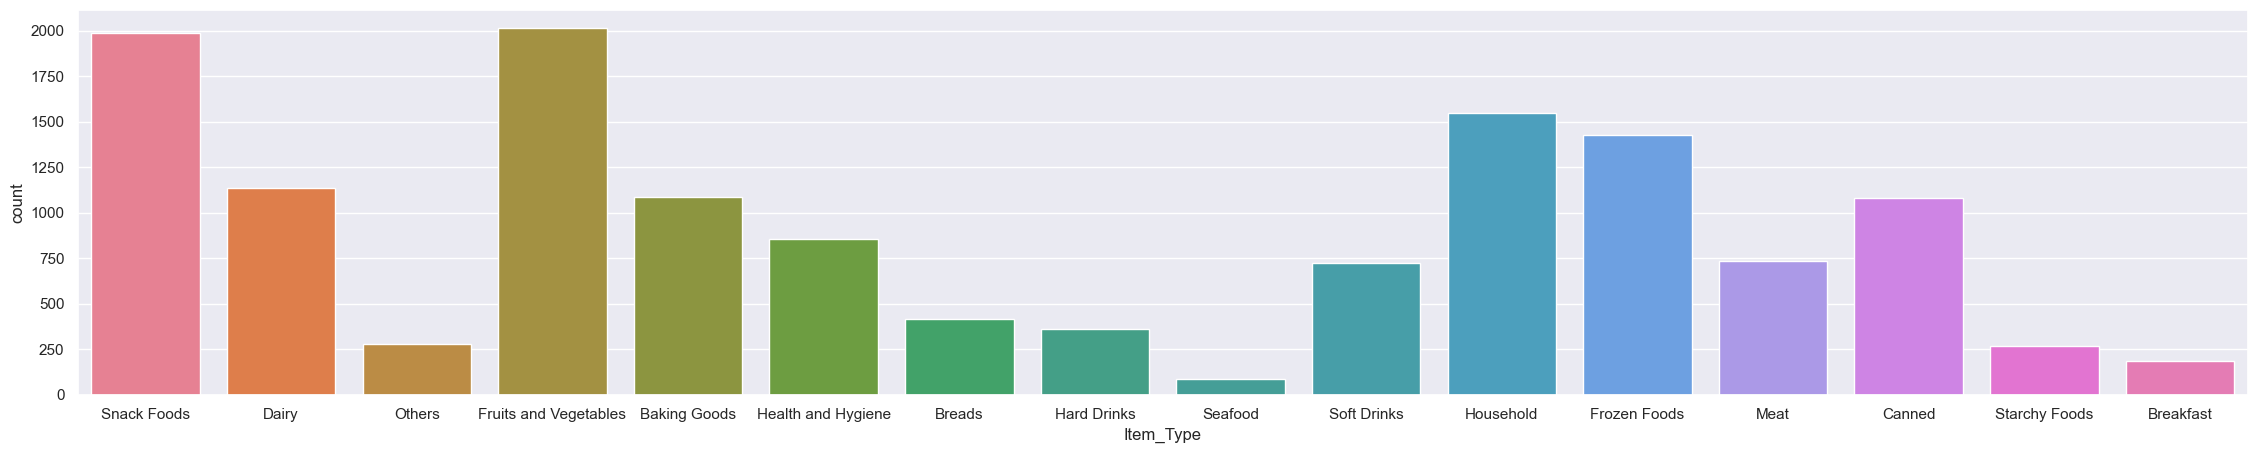

In [265]:
Type = df['Item_Type'].unique()
palette = sns.color_palette("husl", len(Type))  
plt.figure(figsize=(28, 5))
sns.countplot(
    x='Item_Type',
    data=df,
    hue='Item_Type', 
    palette=palette,
    dodge=False  
)
plt.legend([], [], frameon=False)  
plt.show()

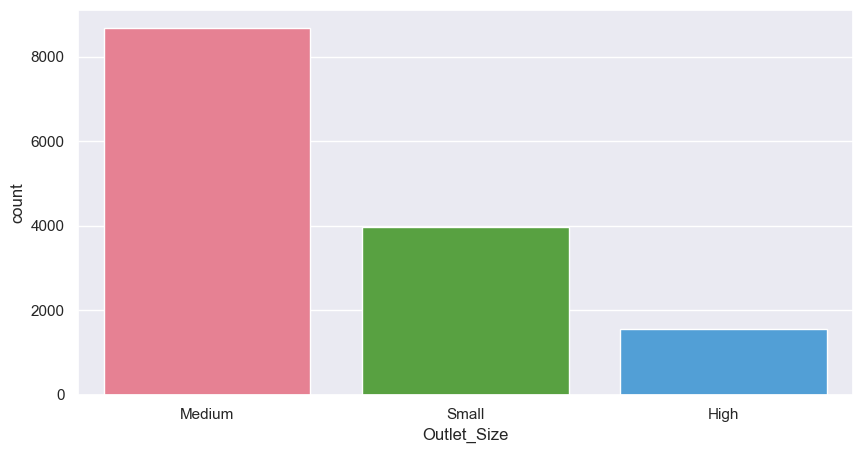

In [267]:
size = df['Outlet_Size'].unique()
palette = sns.color_palette("husl", len(size))  
plt.figure(figsize=(10, 5))
sns.countplot(
    x='Outlet_Size',
    data=df,
    hue='Outlet_Size', 
    palette=palette,
    dodge=False  
)
plt.legend([], [], frameon=False)  
plt.show()